In [1]:
import pandas as pd
import numpy as np
import os
import math
import re
from collections import Counter
import random
import powerlaw
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties  # 导入FontProperties
import warnings
warnings.filterwarnings("ignore")

In [2]:
path1 = r'E:\netData\APS\1 Authors\APS_authors2.0.zip'

In [3]:
df = pd.read_csv(path1)

In [5]:
df['type'] = df['type'].map(dict(zip(['获奖学者' , '非获奖学者'] , ['laureate' , 'non-laureate'])))

In [7]:
df1 = df[df['type']=='laureate']
df2 = df[df['type']=='non-laureate']

In [8]:
d1 = df1['E C']
d2 = df2['E C']
d3 = df1['E h']
d4 = df2['E h']
d5 = df1['C']
d6 = df2['C']
d7 = df1['h']
d8 = df2['h']
d = [np.mean(d1),np.mean(d2),np.mean(d3),np.mean(d4),np.mean(d5),np.mean(d6),np.mean(d7),np.mean(d8)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5,np.std(d4)*len(d4)**-0.5,np.std(d5)*len(d5)**-0.5,np.std(d6)*len(d6)**-0.5,np.std(d7)*len(d7)**-0.5,np.std(d8)*len(d8)**-0.5]

In [9]:
dl1 = [d1,d2,d5,d6]
y_pos = [1,2,4,5]
dlst1 = [d[0],d[1],d[4],d[5]]
yerrlst1 = [std[0],std[1],std[4],std[5]]
clst1 = ['#943126','#1E8449','#943126','#1E8449']
pairs = [(0, 1), (0, 2), (2, 3), (1, 3)]

Text(0.5, 0, 'EC                                          Citation')

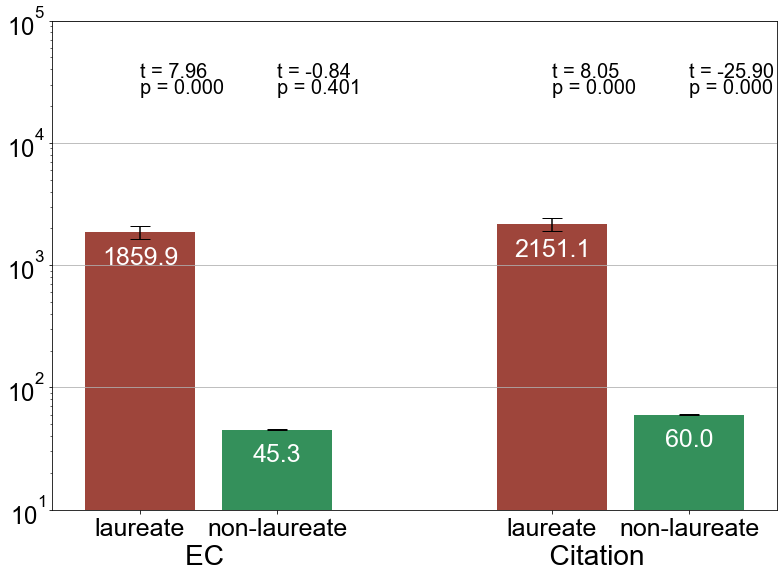

In [15]:
f, ax = plt.subplots(figsize=(13, 9))
plt.rcParams['font.sans-serif'] = ['Arial']
plt.bar(y_pos, dlst1, yerr=yerrlst1,align='center', color= clst1,alpha=0.9,capsize=10)

for i in range(len(dlst1)):
    plt.text(y_pos[i], dlst1[i]*0.55, str(np.round(dlst1[i],1)),c='white', ha='center', fontsize=25)
    

for i, pair in enumerate(pairs):
    t, p = scipy.stats.ttest_ind(dl1[pair[0]].dropna(), dl1[pair[1]].dropna(), equal_var=False, alternative='two-sided')
    plt.text(y_pos[i], ax.get_ylim()[1]*13.5, "t = {:.2f}".format(t), fontsize=20)
    plt.text(y_pos[i], ax.get_ylim()[1]*10, "p = {:.3f}".format(p), fontsize=20)

ax.yaxis.grid(True)
ax.set_yscale("log")
plt.ylim((0,2500))
plt.xticks(y_pos,['laureate','non-laureate','laureate','non-laureate'],fontsize = 25)
plt.yticks([10e0,10e1,10e2,10e3,10e4],size = 24)
plt.xlabel(r'EC'+' '*42  +'Citation',fontsize = 28)
# plt.savefig(r"F:\A J YANG PAPER\APS analysis\Sciento External impact of scientists beyond the research team\fig\fig 4\a11.pdf",bbox_inches = 'tight')

In [16]:
dl1 = [d3,d4,d7,d8]
y_pos = [1,2,4,5]
dlst1 = [d[2],d[3],d[6],d[7]]
yerrlst1 = [std[2],std[3],std[6],std[7]]
clst1 = ['#943126','#1E8449','#943126','#1E8449']
pairs = [(0, 1), (0, 2), (2, 3), (1, 3)]

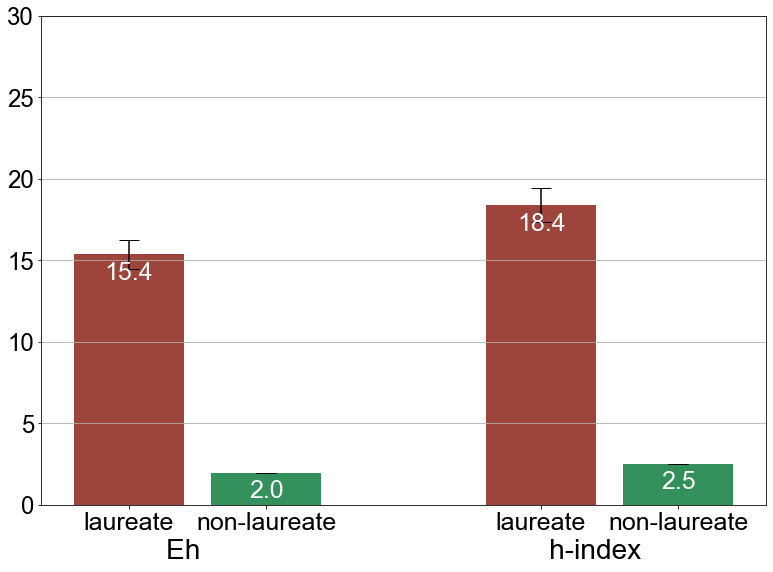

In [20]:
f, ax = plt.subplots(figsize=(13, 9))
plt.rcParams['font.sans-serif'] = ['Arial']
plt.bar(y_pos, dlst1, yerr=yerrlst1,align='center', color= clst1,alpha=0.9,capsize=10)

for i in range(len(dlst1)):
    plt.text(y_pos[i], dlst1[i]-1.5, str(np.round(dlst1[i],1)),c='white', ha='center', fontsize=25)

ax.yaxis.grid(True)
    

# for i, pair in enumerate(pairs):
#     t, p = scipy.stats.ttest_ind(dl1[pair[0]].dropna(), dl1[pair[1]].dropna(), equal_var=False, alternative='two-sided')
#     plt.text(y_pos[i], ax.get_ylim()[1]*1.12, "t = {:.2f}".format(t), fontsize=20)
#     plt.text(y_pos[i], ax.get_ylim()[1]*1, "p = {:.3f}".format(p), fontsize=20)
plt.ylim((0,30))
plt.xticks(y_pos,['laureate','non-laureate','laureate','non-laureate'],fontsize = 25)
plt.yticks(size = 24)
plt.xlabel(r'Eh'+' '*45  +'h-index',fontsize = 28)
plt.savefig(r"F:\A J YANG PAPER\APS analysis\Sciento External impact of scientists beyond the research team\fig\fig 4\a2.pdf",bbox_inches = 'tight')

In [21]:
fsample = df2.sample(n=10000,random_state = 1)

([<matplotlib.axis.YTick at 0x2452f312a30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

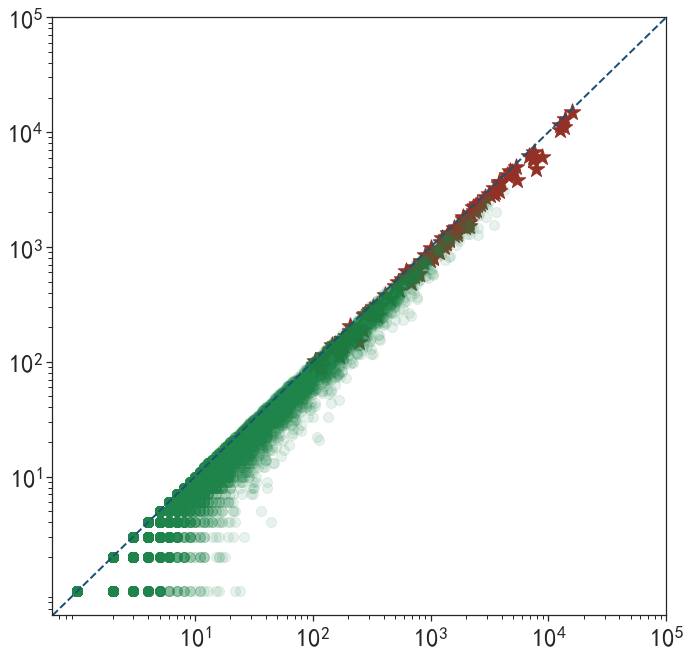

In [108]:
f, ax = plt.subplots(figsize=(11, 11))
for i in range(len(df1)):
    x = df1['C'].values[i]
    y = df1['E C'].values[i]
    ax.scatter(x, y, s=300, c='#943126' , marker = "*", vmin=0, vmax=100)
    
for j in range(len(fsample)):
    x = fsample['C'].values[j]
    y = fsample['E C'].values[j]
    ax.scatter(x, y, s=100, c='#1E8449' , marker = "o", vmin=0, vmax=100, alpha = 0.1)
    
ax.axline([100,100],[10000,10000],linestyle = '--', linewidth=2,c = '#1A5276')

ax.set_xscale("log")
ax.set_yscale("log")
# plt.xticks([0,3000,6000,9000,12000,15000,18000],size = 25)
# plt.yticks([0,3000,6000,9000,12000,15000,18000],size = 25)
plt.xticks([10e0,10e1,10e2,10e3,10e4],size = 25)
plt.yticks([10e0,10e1,10e2,10e3,10e4],size = 25)

([<matplotlib.axis.YTick at 0x2453b923fa0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

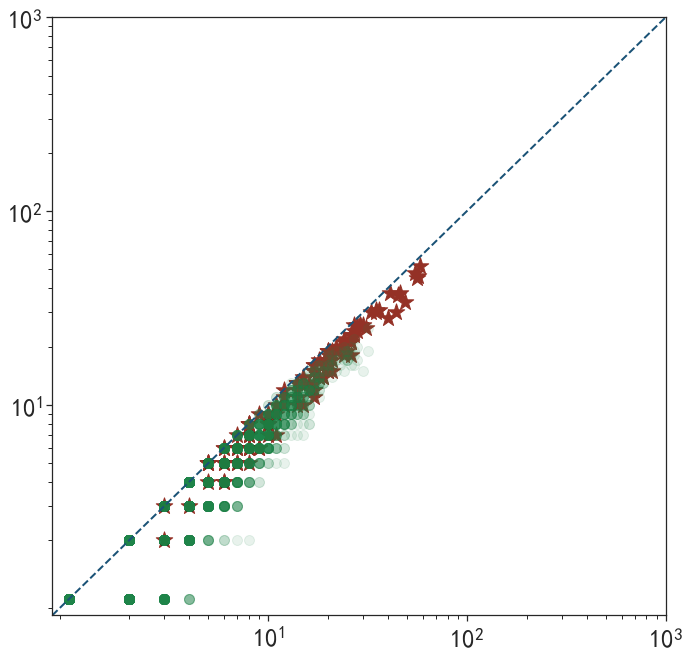

In [109]:
f, ax = plt.subplots(figsize=(11, 11))
for i in range(len(df1)):
    x = df1['h'].values[i]
    y = df1['E h'].values[i]
    ax.scatter(x, y, s=300, c='#943126' , marker = "*", vmin=0, vmax=100)
    
for j in range(len(fsample)):
    x = fsample['h'].values[j]
    y = fsample['E h'].values[j]
    ax.scatter(x, y, s=100, c='#1E8449' , marker = "o", vmin=0, vmax=100, alpha = 0.1)
    
ax.axline([1,1],[10,10],linestyle = '--', linewidth=2,c = '#1A5276')

ax.set_xscale("log")
ax.set_yscale("log")
# plt.xticks([0,20,40,60],size = 25)
# plt.yticks([0,20,40,60],size = 25)
plt.xticks([10e0,10e1,10e2],size = 25)
plt.yticks([10e0,10e1,10e2],size = 25)

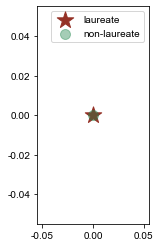

In [22]:
f, ax = plt.subplots(figsize=(2, 4))
ax.scatter(0, 0, s=300, c='#943126' , marker = "*", vmin=0, vmax=100 , label = 'laureate')
ax.scatter(0, 0, s=100, c='#1E8449' , marker = "o", vmin=0, vmax=100, alpha = 0.4, label = 'non-laureate')

plt.legend()
plt.savefig(r"F:\A J YANG PAPER\APS analysis\Sciento External impact of scientists beyond the research team\fig\fig 4\legend.pdf",bbox_inches = 'tight')